In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from skimage.transform import resize
from sklearn.preprocessing import LabelBinarizer
from PIL import  Image
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os
from matplotlib import patches
import tensorflow_datasets as tfds

In [2]:
train_data,info = tfds.load('voc',split='train',with_info=True)
test_data = tfds.load('voc',split='test')
val_data = tfds.load('voc',split='validation')
print("Number of examples in training data:",len(train_data))
print("Number of examples in testing data:",len(test_data))
print("Number of examples in validation data:",len(val_data))
print(info)

Number of examples in training data: 2501
Number of examples in testing data: 4952
Number of examples in validation data: 2510
tfds.core.DatasetInfo(
    name='voc',
    full_name='voc/2007/4.0.0',
    description="""
    This dataset contains the data from the PASCAL Visual Object Classes Challenge,
    corresponding to the Classification and Detection competitions.
    
    In the Classification competition, the goal is to predict the set of labels
    contained in the image, while in the Detection competition the goal is to
    predict the bounding box and label of each individual object.
    annotations.
    """,
    config_description="""
    This dataset contains the data from the PASCAL Visual Object Classes Challenge
    2007, a.k.a. VOC2007.
    
    A total of 9963 images are included in this dataset, where each image
    contains a set of objects, out of 20 different classes, making a total of
    24640 annotated objects.
    
    """,
    homepage='http://host.robots.ox.ac.

In [3]:
image_train=[]
image_test=[]
image_val=[]
bbox_train=[]
bbox_test=[]
bbox_val=[]
label_train=[]
label_test=[]
label_val=[]

In [4]:
def extractData(data,image,bbox,label):
    for info in data:
        image.append(info['image'].numpy())
        bbox.append(info['objects']['bbox'])
        label.append(info['objects']['label'])

In [5]:
extractData(train_data,image_train,bbox_train,label_train)
extractData(test_data,image_test,bbox_test,label_test)
extractData(val_data,image_val,bbox_val,label_val)

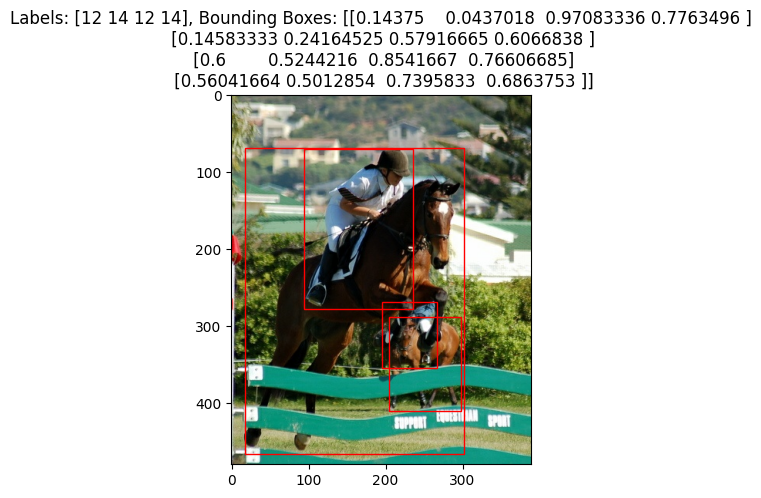

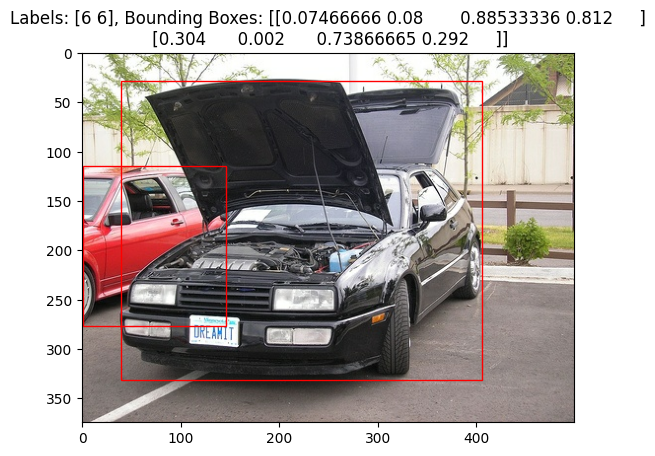

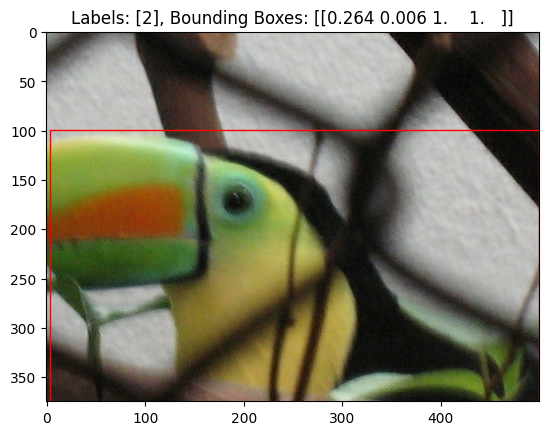

In [6]:
for i in range(3):
    image = image_train[i]
    labels = label_train[i]
    bboxes = bbox_train[i]

    plt.imshow(image)

    for bbox in bboxes:

        ymin, xmin, ymax, xmax = bbox
        rect = patches.Rectangle(
            (xmin * image.shape[1], ymin * image.shape[0]),
            (xmax - xmin) * image.shape[1],
            (ymax - ymin) * image.shape[0],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )
        plt.gca().add_patch(rect)

    plt.title(f'Labels: {labels.numpy()}, Bounding Boxes: {bboxes.numpy()}')
    plt.show()

In [11]:
def resize_images(images, target_size=(226, 226, 3)):
    resized_images = []
    for image in images:
        resized_image = resize(image, target_size, anti_aliasing=True)
        resized_images.append(resized_image)
    return resized_images


In [14]:
image_train_resize = resize_images(image_train)
image_test_resize = resize_images(image_test)
image_val_resize = resize_images(image_val)

In [15]:
print(label_test)

[<tf.Tensor: shape=(2,), dtype=int64, numpy=array([11, 15])>, <tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 6, 14, 14, 14, 14, 14])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([19])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([11])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([10, 14, 14, 14])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([15, 15, 15, 14])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([6])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([1, 1])>, <tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 8,  8,  8, 19, 19, 19])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([14, 13])>, <tf.Tensor: shape=(3,), dtype=int64, numpy=array([17, 14, 14])>, <tf.Tensor: shape=(1,), dtype=int64, numpy=array([5])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 3, 14])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([14, 12])>, <tf.Tensor: shape=(2,), dtype=int64, numpy=array([11, 11])>, <tf.Tensor: shape=(4,), dtype=int64, numpy=array([11